Let's again consider the function of two variables that we saw before:

$$f(x, y) = -0.4+(x+15)/30 + (y+15)/40 + 0.5\sin(r), r = \sqrt{x^2+y^2}$$

We can plot this function as before:



In [11]:
%matplotlib inline  

from numpy import *
from numpy.linalg import norm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pyplot import *
from numpy import *


def f(x, y):
    r = sqrt(x**2 + y**2)
    return -.4 + (x+15)/30. + (y+15)/40.+.5*sin(r)


x = arange(-15, 15, 0.25)
y = arange(-15, 15, 0.25)
X, Y = meshgrid(x, y)
R = sqrt(X**2 + Y**2)
Z = -.4 + (X+15)/30. + (Y+15)/40.+.5*sin(R)    

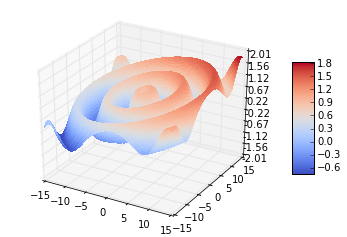

In [12]:
fig = figure(3)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-2.01, 2.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
show()    

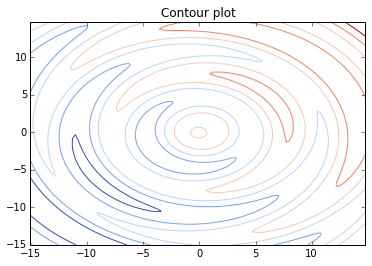

In [13]:
x = arange(-15, 15, 0.25)
y = arange(-15, 15, 0.25)
X, Y = meshgrid(x, y)
R = sqrt(X**2 + Y**2)
Z = -.4 + (X+15)/30. + (Y+15)/40.+.5*sin(R)

figure(1)
CS = contour(X, Y, Z, cmap=cm.coolwarm)
#clabel(CS, inline=1, fontsize=10)
title('Contour plot')

show()

Suppose we want to find a local minimum of this function. In order to do that, we need to compute its gradient.

Here is a sample computation:

$$\frac{\partial f}{\partial x} = 1/30 + 0.5\cos(r)\frac{\partial r}{\partial x}$$

$$\frac{\partial r}{\partial x} = (0.5(x^2+y^2)^{-1/2})(2 x)$$

We can get the following:

In [14]:
def drdx(x, y, r):
    return (.5*(x**2 + y**2)**-.5)*(2*x)

def drdy(x, y, r):
    return (.5*(x**2 + y**2)**-.5)*(2*y)
    
def dfdx(x, y):
    r = sqrt(x**2 + y**2)
    return 1/30. + .5*cos(r)*drdx(x, y, r)
    
def dfdy(x, y):
    r = sqrt(x**2 + y**2)
    return 1/40. + .5*cos(r)*drdy(x, y, r)
    
def gradf(x, y):
    return array([dfdx(x, y), dfdy(x, y)])        

Let's check that we got things right:

In [15]:
x = 0
y = 5
h = 0.001
(f(x+h, y)-f(x, y))/h

0.033347516444903746

In [16]:
dfdx(x, y)

0.033333333333333333

In [17]:
(f(x, y+h)-f(x, y))/h

0.16707080014188858

In [18]:
dfdy(x, y)

0.16683109273161315

Pretty close! We'd expect to get closer if we make $h$ smaller.

In [19]:
gradf(x, y)

array([ 0.03333333,  0.16683109])

That's just the same thing. We are now ready to implement gradient descent

In [23]:
# t = np.array([x, y])
def grad_descent2(f, gradf, init_t, alpha):
    EPS = 1e-5
    prev_t = init_t-10*EPS
    t = init_t.copy()
    
    max_iter = 1000
    iter = 0
    while norm(t - prev_t) > EPS and iter < max_iter:
        prev_t = t.copy()
        t -= alpha*gradf(t[0], t[1])
        print iter, t, f(t[0], t[1]), gradf(t[0], t[1])
        iter += 1
    
    return t

Let's try to run it, guided by the countour plot about where to start.

In [24]:
f(10., 8.)

1.1271253262964116

In [25]:
grad_descent2(f, gradf, array([10.0, 8.0]), 0.01)

0 [ 9.99587412  7.99671596] 1.124342902 [ 0.413072    0.32879157]
1 [ 9.9917434   7.99342804] 1.12155397037 [ 0.41354556  0.32917105]
2 [ 9.98760794  7.99013633] 1.11875865954 [ 0.41400905  0.32954248]
3 [ 9.98346785  7.98684091] 1.11595709897 [ 0.41446241  0.3299058 ]
4 [ 9.97932323  7.98354185] 1.11314941939 [ 0.41490557  0.33026098]
5 [ 9.97517417  7.98023924] 1.11033575278 [ 0.41533849  0.33060795]
6 [ 9.97102078  7.97693316] 1.10751623235 [ 0.4157611   0.33094668]
7 [ 9.96686317  7.97362369] 1.10469099251 [ 0.41617334  0.33127712]
8 [ 9.96270144  7.97031092] 1.10186016887 [ 0.41657517  0.33159923]
9 [ 9.95853569  7.96699493] 1.09902389818 [ 0.41696652  0.33191296]
10 [ 9.95436602  7.9636758 ] 1.09618231834 [ 0.41734736  0.33221828]
11 [ 9.95019255  7.96035362] 1.09333556834 [ 0.41771762  0.33251514]
12 [ 9.94601537  7.95702847] 1.09048378828 [ 0.41807726  0.3328035 ]
13 [ 9.9418346   7.95370043] 1.0876271193 [ 0.41842622  0.33308333]
14 [ 9.93765034  7.9503696 ] 1.08476570356 [ 0.

array([ 8.52620525,  6.83732121])